# Clean code

In [48]:
import pandas as pd
import datetime

def process_csv(filepath, product_index):
    """
    This function takes the file path and product index as inputs and returns the filtered trade data dataframe
    for a particular product.
    
    Parameters:
    filepath (str) : file path for the trade data file
    product_index (int) : index of the product in the list of all products
    
    Returns:
    df_product_filtered (pandas dataframe) : dataframe for the filtered product
    """
    
    # Read the CSV file and convert the "TIME_PERIOD" column to datetime
    trade_data = pd.read_csv(filepath)
    trade_data["TIME_PERIOD"] = pd.to_datetime(trade_data["TIME_PERIOD"], format = '%Y-%m').dt.date
    
    # Rename columns and remove duplicates
    trade_data = trade_data.rename(columns={"partner": "PARTNER_codes", "declarant": "DECLARANT_codes"})
    trade_data = trade_data.drop_duplicates()
    
    # Get the list of all products
    products = trade_data["product"].drop_duplicates().to_list()
    
    # Filter the data for a particular product
    product_filter = products[product_index]
    
    # Read the partner countries data
    partner_countries = pd.read_csv("trade_data/partners.csv", sep = ";")
    
    # Merge the trade data and partner country data on the "PARTNER_codes" column
    trade_data = pd.merge(trade_data, partner_countries, on = ['PARTNER_codes'], how = 'inner')
    
    # Pivot the trade data to create a multi-index dataframe
    trade_data_pivot = trade_data.pivot(index=['PARTNER_Labels', 'TIME_PERIOD', 'product'], 
                                  columns='indicators', 
                                  values=['OBS_VALUE'])
    
    # Flatten the column names
    trade_data_pivot.columns = trade_data_pivot.columns.map('_'.join)
    
    # Reset the index and remove missing values
    trade_data_pivot = trade_data_pivot.reset_index()
    trade_data_pivot = trade_data_pivot.dropna()
    
    # Filter the data for the selected product
    df = trade_data_pivot
    df_product_filtered = df[df['product'] == product_filter]

    
    return df_product_filtered

#Declare DataFrames for all good/productcode combinations
df_sunflower_oil_0 = process_csv("trade_data/sunflower_oil.csv", 0)
df_sunflower_oil_0['price'] = df_sunflower_oil_0['OBS_VALUE_VALUE_1000EURO'] / df_sunflower_oil_0['OBS_VALUE_QUANTITY_TON']
df_sunflower_oil_1 = process_csv("trade_data/sunflower_oil.csv", 1)
df_sunflower_oil_1['price'] = df_sunflower_oil_1['OBS_VALUE_VALUE_1000EURO'] / df_sunflower_oil_1['OBS_VALUE_QUANTITY_TON']
df_maize_corn_0 = process_csv("trade_data/maize_corn.csv", 0)
df_maize_corn_0['price'] = df_maize_corn_0['OBS_VALUE_VALUE_1000EURO'] / df_maize_corn_0['OBS_VALUE_QUANTITY_TON']
df_wheat_0 = process_csv("trade_data/wheat.csv", 0)
df_wheat_0['price'] = df_wheat_0['OBS_VALUE_VALUE_1000EURO'] / df_wheat_0['OBS_VALUE_QUANTITY_TON']
df_wheat_1 = process_csv("trade_data/wheat.csv", 1)
df_wheat_1['price'] = df_wheat_1['OBS_VALUE_VALUE_1000EURO'] / df_wheat_1['OBS_VALUE_QUANTITY_TON']
df_wheat_2 = process_csv("trade_data/wheat.csv", 2)
df_wheat_2['price'] = df_wheat_2['OBS_VALUE_VALUE_1000EURO'] / df_wheat_2['OBS_VALUE_QUANTITY_TON']

#Combine all the DataFrames for each good/productcode combination into a single list
dfs = [df_sunflower_oil_0, df_sunflower_oil_1, df_maize_corn_0, df_wheat_0, df_wheat_1, df_wheat_2]

#Concatenate all the DataFrames in the list into a single DataFrame
df_combined = pd.concat(dfs)

#Sort the combined DataFrame by the 'TIME_PERIOD' column
df_combined = df_combined.sort_values(by='TIME_PERIOD')

#Create a pivot table from the combined DataFrame, with 'TIME_PERIOD' as the index and 'PARTNER_Labels' and 'product' as columns, and 'OBS_VALUE_QUANTITY_TON' and 'OBS_VALUE_VALUE_1000EURO' as values
df_pivot = df_combined.pivot_table(index='TIME_PERIOD', columns=['PARTNER_Labels', 'product'], values=['OBS_VALUE_QUANTITY_TON', 'OBS_VALUE_VALUE_1000EURO', 'price'])
df_pivot

#optional
#Unstack the pivot table so that the columns become the innermost index
#df_unstacked = df_pivot.unstack(level=0)

OBS_VALUE_QUANTITY_TON                                         \
PARTNER_Labels            Afghanistan Antigua and Barbuda Argentina            
product                      10059000            10059000  100199   10059000   
TIME_PERIOD                                                                    
2005-01-01                        NaN                 NaN       NaN   8100.0   
2005-02-01                        NaN                 NaN       NaN   3172.0   
2005-03-01                        NaN                 NaN       NaN  17733.4   
2005-04-01                        NaN                 NaN       NaN  10709.9   
2005-05-01                        NaN                 NaN       NaN    663.9   
...                               ...                 ...       ...      ...   
2022-06-01                        NaN                 NaN       NaN     10.6   
2022-07-01                        NaN                 NaN       NaN     11.9   
2022-08-01                        NaN                 NaN       NaN  11204.9   
2022-09-01                        NaN                 NaN       NaN      1.2   
2022-10-01                        NaN                 NaN       NaN    179.9   

                                                                       ...  \
PARTNER_Labels                    Armenia Australia                    ...   
product        15121191 15121990 15121990  100199   10059000 15121191  ...   
TIME_PERIOD                                                            ...   
2005-01-01      21086.3      NaN      NaN       NaN      NaN      NaN  ...   
2005-02-01      18325.9      NaN      NaN       NaN      NaN      NaN  ...   
2005-03-01      25661.5      NaN      NaN       NaN      NaN      NaN  ...   
2005-04-01      33839.2      NaN      NaN       NaN      NaN      NaN  ...   
2005-05-01      41051.1      NaN      NaN       NaN      NaN      NaN  ...   
...                 ...      ...      ...       ...      ...      ...  ...   
2022-06-01        593.6      0.9      NaN       NaN      0.1      NaN  ...   
2022-07-01          NaN      0.7      NaN       NaN      NaN      NaN  ...   
2022-08-01         13.4      0.3      NaN       NaN      NaN      NaN  ...   
2022-09-01          NaN      0.7      NaN       NaN      NaN      NaN  ...   
2022-10-01          NaN      0.3      NaN       0.0      NaN      NaN  ...   

                       price                                                   \
PARTNER_Labels United States                                          Uruguay   
product             100199    100810    10059000  15121191  15121990 10059000   
TIME_PERIOD                                                                     
2005-01-01               NaN       NaN  0.334963       NaN       NaN      NaN   
2005-02-01               NaN       NaN  0.270379       NaN       NaN      NaN   
2005-03-01               NaN       NaN  0.274034       NaN       NaN      NaN   
2005-04-01               NaN       NaN  0.365034       NaN       NaN      NaN   
2005-05-01               NaN  1.011538  0.298552       NaN       NaN      NaN   
...                      ...       ...       ...       ...       ...      ...   
2022-06-01               NaN       NaN  0.424965  1.582609  1.206250      NaN   
2022-07-01               NaN       NaN  0.424000  1.581579  1.210695      NaN   
2022-08-01               NaN       NaN  0.430002  1.603030  1.211340      NaN   
2022-09-01               NaN       inf  0.430013  1.589313       inf      NaN   
2022-10-01               NaN       NaN  0.443971  1.577778  1.209643      NaN   

                                                    
PARTNER_Labels          Viet Nam   Zambia Zimbabwe  
product        15121191 10059000 10059000 10059000  
TIME_PERIOD                                         
2005-01-01          NaN      NaN      NaN    3.080  
2005-02-01          NaN      NaN      NaN    2.550  
2005-03-01          NaN      NaN      NaN    1.900  
2005-04-01          NaN      NaN      NaN    0.775  
200

# Code that is under construction

OBS_VALUE_QUANTITY_TON                                          \
product                   100119        100199      100810        10059000   
TIME_PERIOD                                                                  
2005-01-01                     NaN           NaN   87.775000  11073.880000   
2005-02-01                     NaN           NaN   60.160000  15168.960000   
2005-03-01                     NaN           NaN  440.925000  10675.873684   
2005-04-01                     NaN           NaN  262.350000  12930.229412   
2005-05-01                     NaN           NaN  454.400000  11827.956250   
...                            ...           ...         ...           ...   
2022-06-01              153.562963  13537.980645    7.155172   9204.527907   
2022-07-01              160.981481   9136.539286    8.803333   9230.451220   
2022-08-01              121.737037   8591.396429    2.910345  12217.215909   
2022-09-01              165.714815  10140.339286   20.190000   9504.818182   
2022-10-01              291.670370  11495.793103   11.723333   6558.775610   

                                      OBS_VALUE_VALUE_1000EURO               \
product         15121191     15121990                 100119       100199     
TIME_PERIOD                                                                   
2005-01-01   2424.430000  1014.200000                      NaN          NaN   
2005-02-01   2268.477778   974.450000                      NaN          NaN   
2005-03-01   3344.360000   905.460000                      NaN          NaN   
2005-04-01   4389.822222  1160.900000                      NaN          NaN   
2005-05-01   5273.900000  1095.625000                      NaN          NaN   
...                  ...          ...                      ...          ...   
2022-06-01   1588.434375   390.180000                47.314444  4569.353548   
2022-07-01    977.944828   382.187500                57.545926  3189.770357   
2022-08-01    572.290323   251.818605                38.703704  2970.530000   
2022-09-01    538.503226   275.643902                54.102222  3264.718214   
2022-10-01   1380.616129   279.892683                83.839630  3887.972414   

                                                                  price  \
product        100810       10059000     15121191    15121990  100119     
TIME_PERIOD                                                               
2005-01-01    20.740000  1355.651333  1268.029000  704.867500       NaN   
2005-02-01    17.074000  1798.711333  1173.301111  668.782500       NaN   
2005-03-01    97.865000  1296.019474  1813.515000  634.378000       NaN   
2005-04-01    63.792500  1500.809412  2260.192222  826.400000       NaN   
2005-05-01   123.414000  1447.397500  2602.358750  754.360000       NaN   
...                 ...          ...          ...         ...       ...   
2022-06-01    10.067586  3337.626047  2329.669687  686.350750       NaN   
2022-07-01    14.003333  3729.054146  1731.331379  754.707250  0.224635   
2022-08-01     4.730345  3105.268864   941.236774  490.425116  0.218860   
2022-09-01    33.107000  2951.222955   790.587097  503.828293       NaN   
2022-10-01    16.522667  2277.045122  1913.833226  509.280244  0.215305   

                                                               
product      100199    100810    10059000  15121191  15121990  
TIME_PERIOD                                                    
2005-01-01        NaN  1.313571  1.492804       NaN  0.691770  
2005-02-01        NaN  0.865550       NaN  0.819334  0.674585  
2005-03-01        NaN  0.963669       NaN       NaN  2.551005  
2005-04-01        NaN  1.437052       NaN       NaN  0.713174  
2005-05-01        NaN  1.721447       NaN       NaN  1.044074  
...               ...       ...       ...       ...       ...  
2022-06-01   0.245592       NaN       NaN       NaN       NaN  
2022-07-01   0.253166       NaN  0.498992       NaN       NaN  
2022-08-01   0.223109       NaN       NaN       NaN      

In [75]:
import pandas as pd
import datetime

def process_csv(filepath, product_index):
    """
    This function takes the file path and product index as inputs and returns the filtered trade data dataframe
    for a particular product.
    
    Parameters:
    filepath (str) : file path for the trade data file
    product_index (int) : index of the product in the list of all products
    
    Returns:
    df_product_filtered (pandas dataframe) : dataframe for the filtered product
    """
    
    # Read the CSV file and convert the "TIME_PERIOD" column to datetime
    trade_data = pd.read_csv(filepath)
    trade_data["TIME_PERIOD"] = pd.to_datetime(trade_data["TIME_PERIOD"], format = '%Y-%m').dt.date
    
    # Rename columns and remove duplicates
    trade_data = trade_data.rename(columns={"partner": "PARTNER_codes", "declarant": "DECLARANT_codes"})
    trade_data = trade_data.drop_duplicates()
    
    # Get the list of all products
    products = trade_data["product"].drop_duplicates().to_list()
    
    # Filter the data for a particular product
    product_filter = products[product_index]
    
    # Read the partner countries data
    partner_countries = pd.read_csv("trade_data/partners.csv", sep = ";")
    
    # Merge the trade data and partner country data on the "PARTNER_codes" column
    trade_data = pd.merge(trade_data, partner_countries, on = ['PARTNER_codes'], how = 'inner')
    
    # Pivot the trade data to create a multi-index dataframe
    trade_data_pivot = trade_data.pivot(index=['PARTNER_Labels', 'TIME_PERIOD', 'product'], 
                                  columns='indicators', 
                                  values=['OBS_VALUE'])
    
    # Flatten the column names
    trade_data_pivot.columns = trade_data_pivot.columns.map('_'.join)
    
    # Reset the index and remove missing values
    trade_data_pivot = trade_data_pivot.reset_index()
    trade_data_pivot = trade_data_pivot.dropna()
    
    # Filter the data for the selected product
    df = trade_data_pivot
    df_product_filtered = df[df['product'] == product_filter]

    
    return df_product_filtered

#Declare DataFrames for all good/productcode combinations
df_sunflower_oil_0 = process_csv("trade_data/sunflower_oil.csv", 0)
df_sunflower_oil_0['price'] = df_sunflower_oil_0['OBS_VALUE_VALUE_1000EURO'] / df_sunflower_oil_0['OBS_VALUE_QUANTITY_TON']
df_sunflower_oil_1 = process_csv("trade_data/sunflower_oil.csv", 1)
df_sunflower_oil_1['price'] = df_sunflower_oil_1['OBS_VALUE_VALUE_1000EURO'] / df_sunflower_oil_1['OBS_VALUE_QUANTITY_TON']
df_maize_corn_0 = process_csv("trade_data/maize_corn.csv", 0)
df_maize_corn_0['price'] = df_maize_corn_0['OBS_VALUE_VALUE_1000EURO'] / df_maize_corn_0['OBS_VALUE_QUANTITY_TON']
df_wheat_0 = process_csv("trade_data/wheat.csv", 0)
df_wheat_0['price'] = df_wheat_0['OBS_VALUE_VALUE_1000EURO'] / df_wheat_0['OBS_VALUE_QUANTITY_TON']
df_wheat_1 = process_csv("trade_data/wheat.csv", 1)
df_wheat_1['price'] = df_wheat_1['OBS_VALUE_VALUE_1000EURO'] / df_wheat_1['OBS_VALUE_QUANTITY_TON']
df_wheat_2 = process_csv("trade_data/wheat.csv", 2)
df_wheat_2['price'] = df_wheat_2['OBS_VALUE_VALUE_1000EURO'] / df_wheat_2['OBS_VALUE_QUANTITY_TON']

# Combine '15121191' and '15121990' as 'sunflower oil'
df_sunflower_oil = pd.concat([df_sunflower_oil_0, df_sunflower_oil_1], ignore_index=True)
df_sunflower_oil['product'] = 'sunflower oil'

# Keep '10059000' the same but name it 'maize'
df_maize = df_maize_corn_0
df_maize['product'] = 'maize'

# Combine '100119', '100199' and '100810' as 'wheat'
df_wheat = pd.concat([df_wheat_0, df_wheat_1, df_wheat_2], ignore_index=True)
df_wheat['product'] = 'wheat'

# Combine all product dataframes into one
df_aggregated = pd.concat([df_sunflower_oil, df_maize, df_wheat], ignore_index=True)
df_aggregated_copy = df_aggregated.copy()
for month, month_data in df_aggregated_copy.groupby('TIME_PERIOD'):
    # Calculate the total amount of OBS_VALUE_QUANTITY_TON for each product
    total_obs_value_quantity_ton = month_data.groupby('product')['OBS_VALUE_QUANTITY_TON'].sum()

    # Calculate the relative weight of each product to the total amount of OBS_VALUE_QUANTITY_TON
    weight = month_data['OBS_VALUE_QUANTITY_TON'].div(month_data['product'].map(total_obs_value_quantity_ton))

    # Create the weighted_price column
    month_data['weighted_price'] = weight * month_data['price']

    # Calculate the weighted OBS_VALUE_QUANTITY_TON
    month_data['OBS_VALUE_QUANTITY_TON'] = weight * month_data['OBS_VALUE_QUANTITY_TON']

    # Calculate the weighted OBS_VALUE_VALUE_1000EURO
    month_data['OBS_VALUE_VALUE_1000EURO'] = weight * month_data['OBS_VALUE_VALUE_1000EURO']

df_aggregated = df_aggregated_copy.copy()
# Reset the index and remove the 'price' column
df_aggregated = df_aggregated.reset_index(drop=True)
df_aggregated = df_aggregated.sort_values(by='TIME_PERIOD')

#Create a pivot table from the combined DataFrame, with 'TIME_PERIOD' as the index and 'PARTNER_Labels' and 'product' as columns, and 'OBS_VALUE_QUANTITY_TON' and 'OBS_VALUE_VALUE_1000EURO' as values
df_pivot3 = df_aggregated.pivot_table(index='TIME_PERIOD', columns=['PARTNER_Labels', 'product'], values=['OBS_VALUE_QUANTITY_TON', 'OBS_VALUE_VALUE_1000EURO', 'price'])
df_wheat

###FOR NOW
df_maize_corn_trade = df_maize.pivot_table(index='TIME_PERIOD', columns=['PARTNER_Labels'], values=['OBS_VALUE_QUANTITY_TON', 'OBS_VALUE_VALUE_1000EURO', 'price'])
df_maize_corn_trade

OBS_VALUE_QUANTITY_TON                                          \
PARTNER_Labels            Afghanistan Antigua and Barbuda Argentina Australia   
TIME_PERIOD                                                                     
2005-01-01                        NaN                 NaN    8100.0       NaN   
2005-02-01                        NaN                 NaN    3172.0       NaN   
2005-03-01                        NaN                 NaN   17733.4       NaN   
2005-04-01                        NaN                 NaN   10709.9       NaN   
2005-05-01                        NaN                 NaN     663.9       NaN   
...                               ...                 ...       ...       ...   
2022-06-01                        NaN                 NaN      10.6       0.1   
2022-07-01                        NaN                 NaN      11.9       NaN   
2022-08-01                        NaN                 NaN   11204.9       NaN   
2022-09-01                        NaN                 NaN       1.2       NaN   
2022-10-01                        NaN                 NaN     179.9       NaN   

                                                                           \
PARTNER_Labels Austria Bangladesh  Belgium Bolivia Bosnia and Herzegovina   
TIME_PERIOD                                                                 
2005-01-01         NaN        NaN   6402.3     NaN                    NaN   
2005-02-01         NaN        NaN   7969.7     NaN                    NaN   
2005-03-01       765.6        NaN   8928.5     NaN                    NaN   
2005-04-01         0.0        NaN  11126.4     NaN                    NaN   
2005-05-01         0.0        NaN   4423.4     NaN                    NaN   
...                ...        ...      ...     ...                    ...   
2022-06-01       277.2        NaN  13892.5     NaN                    NaN   
2022-07-01        35.1        NaN  11350.8     NaN                    NaN   
2022-08-01        25.9        NaN   5171.0     NaN                    NaN   
2022-09-01        25.8        NaN   5487.8     NaN                    NaN   
2022-10-01       170.4        NaN   8449.0     NaN                    NaN   

                          ...     price                                        \
PARTNER_Labels    Brazil  ...   Türkiye Uganda   Ukraine United Arab Emirates   
TIME_PERIOD               ...                                                   
2005-01-01           NaN  ...  0.710000    NaN       NaN                  NaN   
2005-02-01          40.0  ...       NaN    NaN       NaN                  NaN   
2005-03-01           NaN  ...       NaN    NaN       NaN                  NaN   
2005-04-01           NaN  ...       NaN    NaN       inf                  NaN   
2005-05-01           NaN  ...       NaN    NaN       NaN                  NaN   
...                  ...  ...       ...    ...       ...                  ...   
2022-06-01           0.4  ...  0.424940    NaN  0.383358                  NaN   
2022-07-01      129581.8  ...  0.350000    NaN  0.359280                  NaN   
2022-08-01      345766.2  ...  0.300000    NaN  0.357720                  NaN   
2022-09-01      156162.8  ...  0.428571    inf  0.313625                  NaN   
2022-10-01       40138.7  ...  0.442500    NaN  0.313023                  NaN   

                                                                              
PARTNER_Labels United Kingdom United States Uruguay Viet Nam Zambia Zimbabwe  
TIME_PERIOD                                                                   
2005-01-01           0.314011      0.334963     NaN      NaN    NaN    3.080  
2005-02-01           0.380808      0.270379     NaN      NaN    NaN    2.550  
2005-03-01           0.329100      0.274034     NaN      NaN    NaN    1.900  
2005-04-01           0.292759      0.365034     NaN      NaN    NaN    0.775  
2005-05-01           0.336029      0.298552     NaN      NaN    NaN      inf  
...                       ...     

In [68]:
for month, month_data in df_aggregated.groupby('TIME_PERIOD'):
    # Calculate the total amount of OBS_VALUE_QUANTITY_TON for each product
    total_obs_value_quantity_ton = month_data.groupby('product')['OBS_VALUE_QUANTITY_TON'].sum()

    # Calculate the relative weight of each product to the total amount of OBS_VALUE_QUANTITY_TON
    weight = month_data['OBS_VALUE_QUANTITY_TON'].div(month_data['product'].map(total_obs_value_quantity_ton))

    # Create the weighted_price column
    month_data['weighted_price'] = weight * month_data['price']

    # Calculate the weighted OBS_VALUE_QUANTITY_TON
    month_data['OBS_VALUE_QUANTITY_TON'] = weight * month_data['OBS_VALUE_QUANTITY_TON']

    # Calculate the weighted OBS_VALUE_VALUE_1000EURO
    month_data['OBS_VALUE_VALUE_1000EURO'] = weight * month_data['OBS_VALUE_VALUE_1000EURO']

# Reset the index and remove the 'price' column
df_aggregated = df_aggregated.reset_index(drop=True)

df_aggregated = df_aggregated.sort_values(by='TIME_PERIOD')

#Create a pivot table from the combined DataFrame, with 'TIME_PERIOD' as the index and 'PARTNER_Labels' and 'product' as columns, and 'OBS_VALUE_QUANTITY_TON' and 'OBS_VALUE_VALUE_1000EURO' as values
df_pivot = df_aggregated.pivot_table(index='TIME_PERIOD', columns=['PARTNER_Labels', 'product'], values=['OBS_VALUE_QUANTITY_TON', 'OBS_VALUE_VALUE_1000EURO', 'price'])
df_pivot
# Calculate the new 'OBS_VALUE_VALUE_1000EURO' for the product code combinations
# df_sunflower_oil_grouped['OBS_VALUE_VALUE_1000EURO'] = df_sunflower_oil_grouped['weighted_price'] * df_sunflower_oil_grouped['OBS_VALUE

OBS_VALUE_QUANTITY_TON                                \
PARTNER_Labels            Afghanistan Antigua and Barbuda Argentina   
product                         maize               maize     maize   
TIME_PERIOD                                                           
2005-01-01                        NaN                 NaN    8100.0   
2005-02-01                        NaN                 NaN    3172.0   
2005-03-01                        NaN                 NaN   17733.4   
2005-04-01                        NaN                 NaN   10709.9   
2005-05-01                        NaN                 NaN     663.9   
...                               ...                 ...       ...   
2022-06-01                        NaN                 NaN      10.6   
2022-07-01                        NaN                 NaN      11.9   
2022-08-01                        NaN                 NaN   11204.9   
2022-09-01                        NaN                 NaN       1.2   
2022-10-01                        NaN                 NaN     179.9   

                                                                          \
PARTNER_Labels                           Armenia Australia                 
product        sunflower oil wheat sunflower oil     maize sunflower oil   
TIME_PERIOD                                                                
2005-01-01          21086.30   NaN           NaN       NaN           NaN   
2005-02-01          18325.90   NaN           NaN       NaN           NaN   
2005-03-01          25661.50   NaN           NaN       NaN           NaN   
2005-04-01          33839.20   NaN           NaN       NaN           NaN   
2005-05-01          41051.10   NaN           NaN       NaN           NaN   
...                      ...   ...           ...       ...           ...   
2022-06-01            297.25   NaN           NaN       0.1           NaN   
2022-07-01              0.70   NaN           NaN       NaN           NaN   
2022-08-01              6.85   NaN           NaN       NaN           NaN   
2022-09-01              0.70   NaN           NaN       NaN           NaN   
2022-10-01              0.30   NaN           NaN       NaN           NaN   

                              ...          price                          \
PARTNER_Labels       Austria  ... United Kingdom           United States   
product        wheat   maize  ...  sunflower oil     wheat         maize   
TIME_PERIOD                   ...                                          
2005-01-01       NaN     NaN  ...            inf       NaN      0.334963   
2005-02-01       NaN     NaN  ...       0.602395       NaN      0.270379   
2005-03-01       NaN   765.6  ...            inf       NaN      0.274034   
2005-04-01       NaN     0.0  ...            inf       NaN      0.365034   
2005-05-01       NaN     0.0  ...            inf       NaN      0.298552   
...              ...     ...  ...            ...       ...           ...   
2022-06-01       NaN   277.2  ...       2.151872  0.588364      0.424965   
2022-07-01       NaN    35.1  ...            inf       inf      0.424000   
2022-08-01       NaN    25.9  ...            NaN  1.061228      0.430002   
2022-09-01       NaN    25.8  ...       2.118224       NaN      0.430013   
2022-10-01       0.0   170.4  ...       2.751037       NaN      0.443971   

                                                                              \
PARTNER_Labels                         Uruguay               Viet Nam Zambia   
product        sunflower oil     wheat   maize sunflower oil    maize  maize   
TIME_PERIOD                                                                    
2005-01-01               NaN       NaN     NaN           NaN      NaN    NaN   
2005-02-01               NaN       NaN     NaN           NaN      NaN    NaN   
2005-03-01               NaN       NaN     NaN           NaN      NaN    NaN   
2005-04-01               NaN       NaN     NaN           NaN      NaN    NaN   
2005-05-01               Na

In [49]:
# create the mapping from product codes to categories
product_to_category = {10059000: 'maize', 100199: 'wheat', 15121191: 'sunflower oil', 15121990: 'sunflower oil'}

# apply the mapping to get the category for each product
df_pivot['product_category'] = df_pivot['product'].map(product_to_category)

# group the pivot table by the time period and category and compute the weighted total value
df_grouped = df_pivot.groupby(['TIME_PERIOD', 'product_category']).sum()
df_grouped['weighted_value'] = df_grouped['OBS_VALUE_QUANTITY_TON'] * df_grouped['price']

# reset the index to make the time period and category columns into regular columns
df_grouped = df_grouped.reset_index()

KeyError: 'product'

## Try to combine product cats to one category

In [28]:
import pandas as pd
import numpy as np

def find_top_countries(df, product_code, month):
    # Filter the data for the given product code
    product_df = df[df.index == product_code]
    
    # Get the data for the given month
    month_df = product_df.loc[:, month].reset_index()
    
    # Rename the columns
    month_df.columns = ['country', 'quantity']
    
    # Sort the data by quantity
    month_df = month_df.sort_values(by='quantity', ascending=False)
    
    # Calculate the cumulative sum of quantity
    month_df['cumulative_sum'] = month_df['quantity'].cumsum()
    
    # Calculate the cumulative sum percentage
    month_df['cumulative_sum_percentage'] = month_df['cumulative_sum'] / month_df['quantity'].sum()
    
    # Find the top countries whose cumulative sum percentage is greater than or equal to 80%
    top_countries = month_df[month_df['cumulative_sum_percentage'] >= 0.8]['country'].tolist()
    
    return top_countries

product_code = 10059000
month = '2005-01-01'
top_countries = find_top_countries(df_pivot, product_code, month)
print("Top countries for product code {} in month {}:".format(product_code, month))
print(top_countries)

KeyError: '2005-01-01'

In [35]:
df_sunflower_oil_0['price'] = df_sunflower_oil_0['OBS_VALUE_VALUE_1000EURO'] / df_sunflower_oil_0['OBS_VALUE_QUANTITY_TON']

In [73]:
# Set the path and name of the Excel file
file_path = "df_wheat100.xlsx"

# Write the df_pivot dataframe to the specified Excel file
df_wheat.to_excel(file_path, index=True)

In [1]:
import pandas as pd
import datetime

def process_csv(filepath, product_index):
    trade_data = pd.read_csv(filepath)

    trade_data["TIME_PERIOD"] = pd.to_datetime(trade_data["TIME_PERIOD"], format = '%Y-%m').dt.date
    trade_data = trade_data.rename(columns={"partner": "PARTNER_codes", "declarant": "DECLARANT_codes"})
    trade_data = trade_data.drop_duplicates()
    #trade_data = trade_data.dropna()

    products = trade_data["product"].drop_duplicates().to_list()
    product_filter = products[product_index]

    partner_countries = pd.read_csv("trade_data/partners.csv", sep = ";")

    trade_data = pd.merge(trade_data, partner_countries, on = ['PARTNER_codes'], how = 'inner')

    trade_data_pivot = trade_data.pivot(index=['PARTNER_Labels', 'TIME_PERIOD', 'product'], 
                                  columns='indicators', 
                                  values=['OBS_VALUE'])

    trade_data_pivot.columns = trade_data_pivot.columns.map('_'.join)
    trade_data_pivot = trade_data_pivot.reset_index()
    trade_data_pivot = trade_data_pivot.dropna()

    df = trade_data_pivot
    df_product_filtered = df[df['product'] == product_filter]
    
    return df_product_filtered

#Declare DataFrames for all good/productcode combinations
df_sunflower_oil_0 = process_csv("trade_data/sunflower_oil.csv", 0)
df_sunflower_oil_1 = process_csv("trade_data/sunflower_oil.csv", 1)
df_maize_corn_0 = process_csv("trade_data/maize_corn.csv", 0)
df_wheat_0 = process_csv("trade_data/wheat.csv", 0)
df_wheat_1 = process_csv("trade_data/wheat.csv", 1)
df_wheat_2 = process_csv("trade_data/wheat.csv", 2)


In [4]:
dfs = [df_sunflower_oil_0, df_sunflower_oil_1, df_maize_corn_0, df_wheat_0, df_wheat_1, df_wheat_2]
df_combined = pd.concat(dfs)
df_combined = df_combined.sort_values(by='TIME_PERIOD')
df_combined

,PARTNER_Labels,TIME_PERIOD,product,OBS_VALUE_QUANTITY_TON,OBS_VALUE_VALUE_1000EURO
0,Argentina,2005-01-01,15121191,21086.3,10489.97
5395,Poland,2005-01-01,100810,75.4,20.27
2546,Germany,2005-01-01,15121191,81.0,79.89
3431,Ireland,2005-01-01,15121191,246.0,192.04
3621,Italy,2005-01-01,15121191,22.0,20.58
...,...,...,...,...,...
6840,Slovenia,2022-10-01,100199,35.7,7.14
1288,Croatia,2022-10-01,15121990,2.5,3.07
3617,Ireland,2022-10-01,15121191,1.1,1.75
894,Bosnia and Herzegovina,2022-10-01,15121990,0.0,0.02


In [18]:
df_pivot = df_combined.pivot_table(index='TIME_PERIOD', columns=['PARTNER_Labels', 'product'], values=['OBS_VALUE_QUANTITY_TON', 'OBS_VALUE_VALUE_1000EURO'])
df_unstacked = df_pivot.unstack(level=0)
df_pivot

OBS_VALUE_QUANTITY_TON                                         \
PARTNER_Labels            Afghanistan Antigua and Barbuda Argentina            
product                      10059000            10059000  100199   10059000   
TIME_PERIOD                                                                    
2005-01-01                        NaN                 NaN       NaN   8100.0   
2005-02-01                        NaN                 NaN       NaN   3172.0   
2005-03-01                        NaN                 NaN       NaN  17733.4   
2005-04-01                        NaN                 NaN       NaN  10709.9   
2005-05-01                        NaN                 NaN       NaN    663.9   
...                               ...                 ...       ...      ...   
2022-06-01                        NaN                 NaN       NaN     10.6   
2022-07-01                        NaN                 NaN       NaN     11.9   
2022-08-01                        NaN                 NaN       NaN  11204.9   
2022-09-01                        NaN                 NaN       NaN      1.2   
2022-10-01                        NaN                 NaN       NaN    179.9   

                                                                       ...  \
PARTNER_Labels                    Armenia Australia                    ...   
product        15121191 15121990 15121990  100199   10059000 15121191  ...   
TIME_PERIOD                                                            ...   
2005-01-01      21086.3      NaN      NaN       NaN      NaN      NaN  ...   
2005-02-01      18325.9      NaN      NaN       NaN      NaN      NaN  ...   
2005-03-01      25661.5      NaN      NaN       NaN      NaN      NaN  ...   
2005-04-01      33839.2      NaN      NaN       NaN      NaN      NaN  ...   
2005-05-01      41051.1      NaN      NaN       NaN      NaN      NaN  ...   
...                 ...      ...      ...       ...      ...      ...  ...   
2022-06-01        593.6      0.9      NaN       NaN      0.1      NaN  ...   
2022-07-01          NaN      0.7      NaN       NaN      NaN      NaN  ...   
2022-08-01         13.4      0.3      NaN       NaN      NaN      NaN  ...   
2022-09-01          NaN      0.7      NaN       NaN      NaN      NaN  ...   
2022-10-01          NaN      0.3      NaN       0.0      NaN      NaN  ...   

               OBS_VALUE_VALUE_1000EURO                                      \
PARTNER_Labels            United States                                       
product                        100199   100810   10059000 15121191 15121990   
TIME_PERIOD                                                                   
2005-01-01                          NaN      NaN    27.40      NaN      NaN   
2005-02-01                          NaN      NaN    11.41      NaN      NaN   
2005-03-01                          NaN      NaN    45.38      NaN      NaN   
2005-04-01                          NaN      NaN    42.49      NaN      NaN   
2005-05-01                          NaN     2.63    30.93      NaN      NaN   
...                                 ...      ...      ...      ...      ...   
2022-06-01                          NaN      NaN   272.53     3.64     7.72   
2022-07-01                          NaN      NaN  6616.99     6.01    22.64   
2022-08-01                          NaN      NaN   180.30     5.29    35.25   
2022-09-01                          NaN     0.04   265.92    20.82     0.03   
2022-10-01                          NaN      NaN   248.89     5.68   125.44   

                                                             
PARTNER_Labels  Uruguay          Viet Nam   Zambia Zimbabwe  
product        10059000 15121191 10059000 10059000 10059000  
TIME_PERIOD                                                  
2005-01-01          NaN      NaN      NaN      NaN     1.54  
2005-02-01          NaN      NaN      NaN      NaN     1.02  
2005-03-01          NaN      NaN      NaN      NaN     0.19  
2005-04-01          NaN

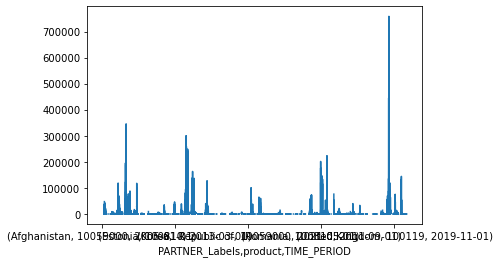

In [13]:
import matplotlib.pyplot as plt

df_unstacked.plot()
plt.show()

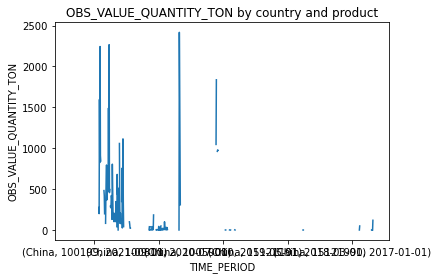

In [15]:
import matplotlib.pyplot as plt

# Get the list of countries you want to plot
countries = ['China']

# Create a boolean mask that returns True only for rows where the 'PARTNER_Labels' column is in the list of countries
mask = df_unstacked.index.get_level_values('PARTNER_Labels').isin(countries)

# Use the boolean mask to index into the dataframe and get only the rows you want to plot
df_plot = df_unstacked[mask]

# Plot the subset of data
df_plot.plot()
plt.xlabel('TIME_PERIOD')
plt.ylabel('OBS_VALUE_QUANTITY_TON')
plt.title('OBS_VALUE_QUANTITY_TON by country and product')
plt.show()

In [2]:
from functools import reduce
dfs = [df_sunflower_oil_0, df_sunflower_oil_1, df_maize_corn_0, df_wheat_0, df_wheat_1, df_wheat_2]
merged_df = reduce(lambda left,right: pd.merge(left,right,on=['PARTNER_Labels','TIME_PERIOD'], how='outer'), dfs)

merged_df

C:\Users\basbe\AppData\Local\Temp\ipykernel_22592\61618327.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'OBS_VALUE_VALUE_1000EURO_x', 'OBS_VALUE_QUANTITY_TON_x', 'product_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = reduce(lambda left,right: pd.merge(left,right,on=['PARTNER_Labels','TIME_PERIOD'], how='outer'), dfs)
C:\Users\basbe\AppData\Local\Temp\ipykernel_22592\61618327.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'OBS_VALUE_VALUE_1000EURO_x', 'OBS_VALUE_QUANTITY_TON_x', 'product_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = reduce(lambda left,right: pd.merge(left,right,on=['PARTNER_Labels','TIME_PERIOD'], how='outer'), dfs)


,PARTNER_Labels,TIME_PERIOD,product_x,OBS_VALUE_QUANTITY_TON_x,OBS_VALUE_VALUE_1000EURO_x,product_y,OBS_VALUE_QUANTITY_TON_y,OBS_VALUE_VALUE_1000EURO_y,product_x,OBS_VALUE_QUANTITY_TON_x,OBS_VALUE_VALUE_1000EURO_x,product_y,OBS_VALUE_QUANTITY_TON_y,OBS_VALUE_VALUE_1000EURO_y,product_x,OBS_VALUE_QUANTITY_TON_x,OBS_VALUE_VALUE_1000EURO_x,product_y,OBS_VALUE_QUANTITY_TON_y,OBS_VALUE_VALUE_1000EURO_y
0,Argentina,2005-01-01,15121191.0,21086.3,10489.97,NaN,NaN,NaN,10059000.0,8100.0,937.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,2005-02-01,15121191.0,18325.9,8946.33,NaN,NaN,NaN,10059000.0,3172.0,392.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,2005-03-01,15121191.0,25661.5,12741.53,NaN,NaN,NaN,10059000.0,17733.4,2133.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,2005-04-01,15121191.0,33839.2,16665.38,NaN,NaN,NaN,10059000.0,10709.9,1174.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,2005-05-01,15121191.0,41051.1,19921.35,NaN,NaN,NaN,10059000.0,663.9,86.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6942,Russia,2010-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100810.0,75.0,32.25
6943,Russia,2022-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100810.0,44.0,33.89
6944,Switzerland,2009-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100810.0,3.0,5.03
6945,Switzerland,2021-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100810.0,2.8,10.38


In [3]:
# Create a MultiIndex by using the from_product method
multiindex = pd.MultiIndex.from_product([time, countries, merged_df.columns], names=['TIME_PERIOD', 'PARTNER_Labels','VARIABLES'])

# Create an empty DataFrame with the MultiIndex
panel_data = pd.DataFrame(index=multiindex)

# Iterate over rows of the original DataFrame and update the panel DataFrame
for row in merged_df.itertuples():
    panel_data.loc[row.TIME_PERIOD, row.PARTNER_Labels] = row[2:]

NameError: name 'pd' is not defined